# Hierarchical Clustering

In [1]:
#importing Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load DataSet
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#check null value
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#check datatype
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
X= df.iloc[:,[3,4]].values #to access column  at 3rd index and 4th index of all row and convert it into a numpy array with help 
#of inbult attribute ".values"
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
#!pip install scipy

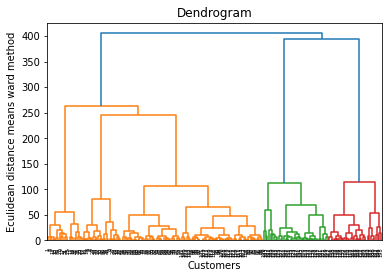

In [7]:
#use dendrogram to find the optimal number of cluster "K"
import scipy.cluster.hierarchy as sch
#creating object of dendogram class which is defined in scipy.cluster.hierarchy
dendrogram= sch.dendrogram(sch.linkage(X,method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eculidean distance means ward method")
plt.show()

In [8]:
#after seaing the graph we can declair that the value of "k =5 " i.e number of cluster =5

In [9]:
#fitting hirerarchial clustering to dataset
from sklearn.cluster import AgglomerativeClustering
#AgglomerativeClustering inbuilt class
#creating object of AgglomerativeClustering class
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",
                           linkage="ward")

In [10]:
Ypred=hc.fit_predict(X)
Ypred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [11]:
#to add new column Target in our dataset
df["Target"]=Ypred

In [12]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


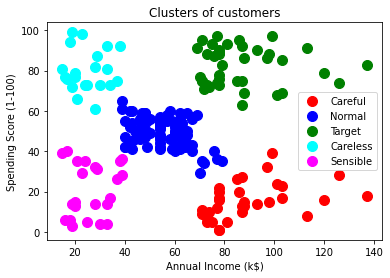

In [14]:
#scatter(X,Y)
        #numpyarray(cluster no,first column)
plt.scatter(X[Ypred == 0, 0], X[Ypred == 0, 1],s=100,c = 'red', 
            label = 'Careful')
plt.scatter(X[Ypred == 1, 0], X[Ypred == 1, 1], s = 100, c = 'blue',
           label = 'Normal')
plt.scatter(X[Ypred == 2, 0], X[Ypred == 2, 1], s = 100, c = 'green',
           label = 'Target')
plt.scatter(X[Ypred == 3, 0], X[Ypred == 3, 1], s = 100, c = 'cyan',
           label='Careless')
plt.scatter(X[Ypred == 4, 0], X[Ypred == 4, 1], s = 100, c = 'magenta',
           label='Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()